# Import Library & Data Loading

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path dataset
dataset_path = '/content/drive/MyDrive/machine learning jurnal/dataset_buah'

#Data Augmentation dan Preprocessing

In [ ]:
# Data Augmentation dan Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=50,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True
)

# Load dataset ke dalam generator
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=1,  # Untuk memuat seluruh data ke dalam array
    class_mode='categorical',
    shuffle=False
)

# Konversi dataset menjadi array
images = np.array([data_generator[i][0][0] for i in range(len(data_generator))])
labels = np.array([data_generator[i][1][0] for i in range(len(data_generator))])

print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

Found 450 images belonging to 9 classes.
Images shape: (450, 128, 128, 3), Labels shape: (450, 9)


# Architecture and Model

In [ ]:
def build_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False  # Freeze base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

#Cross-Validation


Fold 1/5
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 547ms/step - accuracy: 0.2311 - loss: 2.4576 - val_accuracy: 0.9111 - val_loss: 0.5738
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 618ms/step - accuracy: 0.7433 - loss: 0.7766 - val_accuracy: 0.9444 - val_loss: 0.1872
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - accuracy: 0.9440 - loss: 0.2538 - val_accuracy: 0.9444 - val_loss: 0.1356
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.9594 - loss: 0.1694 - val_accuracy: 0.9667 - val_loss: 0.1046
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - accuracy: 0.9582 - loss: 0.1284 - val_accuracy: 0.9556 - val_loss: 0.1459
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 664ms/step - accuracy: 0.9654 - loss: 0.1353 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - accuracy: 0.9837 - loss: 0.0674 - val_accuracy: 0.9889 - val_loss: 0.0693
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 616ms/step - accuracy: 0.9899 - loss: 0.0447 - val_

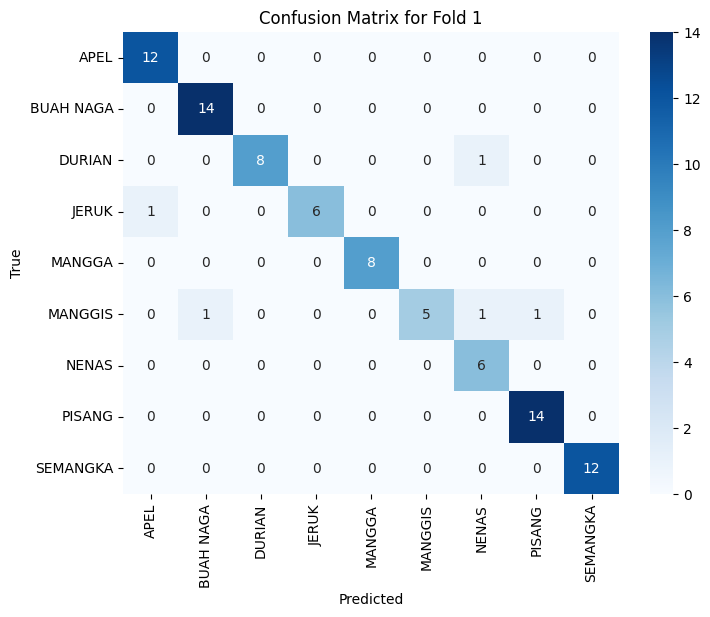

Classification Report for Fold 1:

              precision    recall  f1-score   support

        APEL       0.92      1.00      0.96        12
   BUAH NAGA       0.93      1.00      0.97        14
      DURIAN       1.00      0.89      0.94         9
       JERUK       1.00      0.86      0.92         7
      MANGGA       1.00      1.00      1.00         8
     MANGGIS       1.00      0.62      0.77         8
       NENAS       0.75      1.00      0.86         6
      PISANG       0.93      1.00      0.97        14
    SEMANGKA       1.00      1.00      1.00        12

    accuracy                           0.94        90
   macro avg       0.95      0.93      0.93        90
weighted avg       0.95      0.94      0.94        90


Fold 2/5
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 535ms/step - accuracy: 0.2885 - loss: 2.4198 - val_accuracy: 0.8556 - val_loss: 0.5489
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 538ms/step - accuracy: 0.8302 - loss: 0.5623 - val_accuracy: 0.9444 - val_loss: 

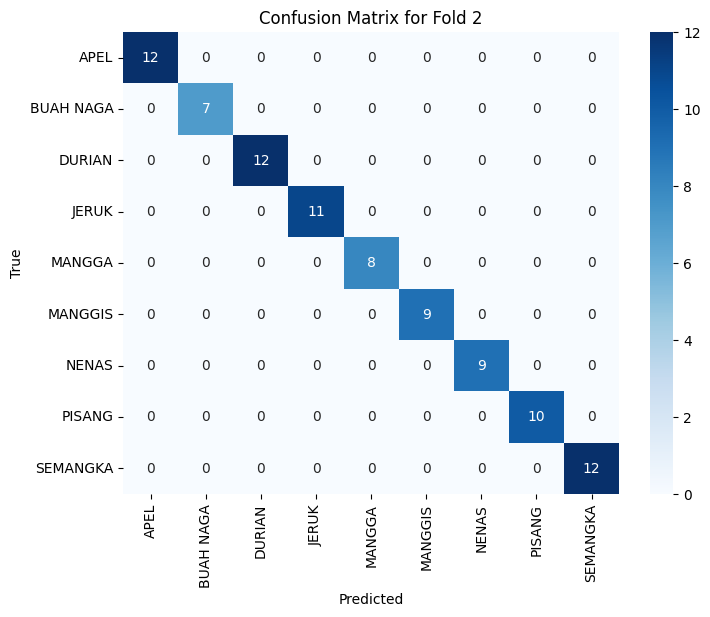

Classification Report for Fold 2:

              precision    recall  f1-score   support

        APEL       1.00      1.00      1.00        12
   BUAH NAGA       1.00      1.00      1.00         7
      DURIAN       1.00      1.00      1.00        12
       JERUK       1.00      1.00      1.00        11
      MANGGA       1.00      1.00      1.00         8
     MANGGIS       1.00      1.00      1.00         9
       NENAS       1.00      1.00      1.00         9
      PISANG       1.00      1.00      1.00        10
    SEMANGKA       1.00      1.00      1.00        12

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90


Fold 3/5
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 530ms/step - accuracy: 0.3431 - loss: 2.3909 - val_accuracy: 0.8333 - val_loss: 0.6312
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.8392 - loss: 0.5963 - val_accuracy: 0.9222 - val_loss: 

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step


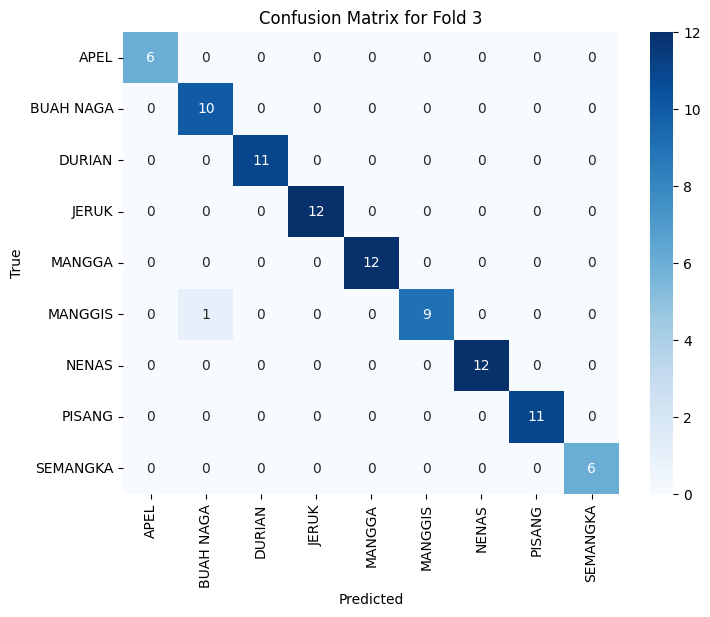

Classification Report for Fold 3:

              precision    recall  f1-score   support

        APEL       1.00      1.00      1.00         6
   BUAH NAGA       0.91      1.00      0.95        10
      DURIAN       1.00      1.00      1.00        11
       JERUK       1.00      1.00      1.00        12
      MANGGA       1.00      1.00      1.00        12
     MANGGIS       1.00      0.90      0.95        10
       NENAS       1.00      1.00      1.00        12
      PISANG       1.00      1.00      1.00        11
    SEMANGKA       1.00      1.00      1.00         6

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


Fold 4/5
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 562ms/step - accuracy: 0.2779 - loss: 2.4128 - val_accuracy: 0.9222 - val_loss: 0.5436
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 622ms/step - accuracy: 0.8659 - loss: 0.5484 - val_accuracy: 0.9556 - val_loss:

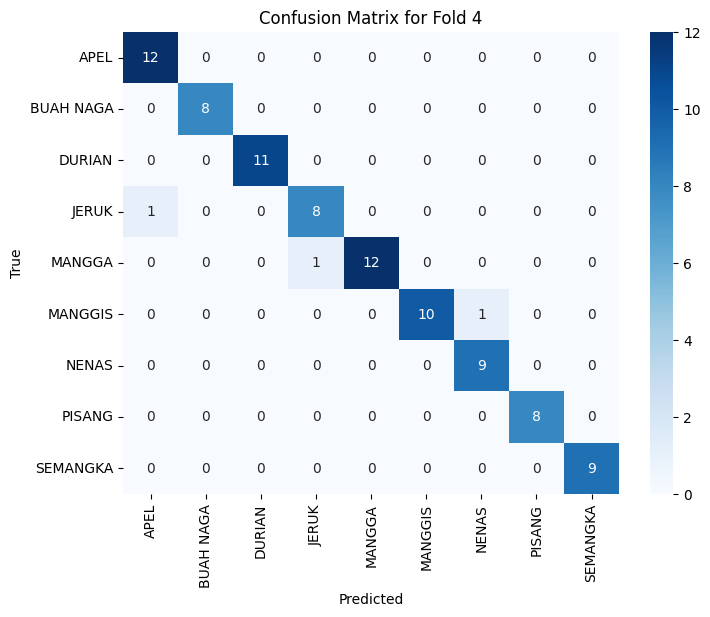

Classification Report for Fold 4:

              precision    recall  f1-score   support

        APEL       0.92      1.00      0.96        12
   BUAH NAGA       1.00      1.00      1.00         8
      DURIAN       1.00      1.00      1.00        11
       JERUK       0.89      0.89      0.89         9
      MANGGA       1.00      0.92      0.96        13
     MANGGIS       1.00      0.91      0.95        11
       NENAS       0.90      1.00      0.95         9
      PISANG       1.00      1.00      1.00         8
    SEMANGKA       1.00      1.00      1.00         9

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Fold 5/5
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 621ms/step - accuracy: 0.3290 - loss: 2.1267 - val_accuracy: 0.8333 - val_loss: 0.5966
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 624ms/step - accuracy: 0.7879 - loss: 0.6244 - val_accuracy: 0.8778 - val_loss: 

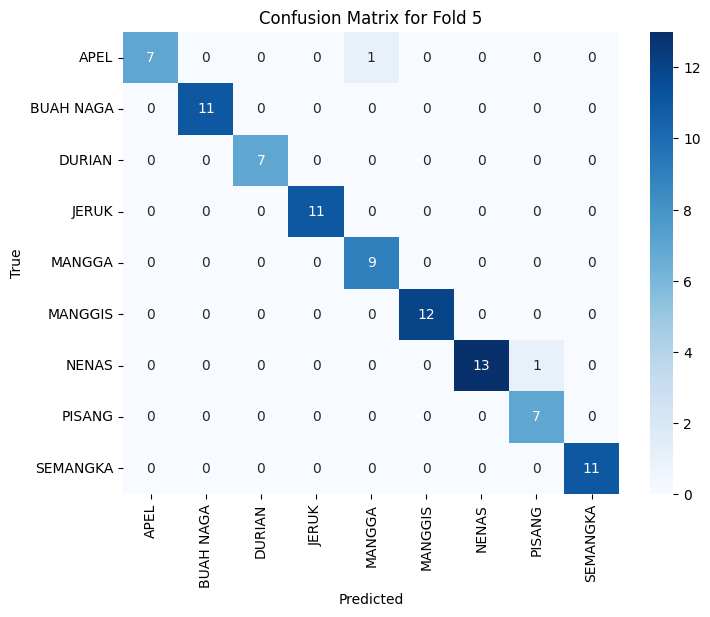

Classification Report for Fold 5:

              precision    recall  f1-score   support

        APEL       1.00      0.88      0.93         8
   BUAH NAGA       1.00      1.00      1.00        11
      DURIAN       1.00      1.00      1.00         7
       JERUK       1.00      1.00      1.00        11
      MANGGA       0.90      1.00      0.95         9
     MANGGIS       1.00      1.00      1.00        12
       NENAS       1.00      0.93      0.96        14
      PISANG       0.88      1.00      0.93         7
    SEMANGKA       1.00      1.00      1.00        11

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [ ]:
# Inisialisasi KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Hasil cross-validation
fold_accuracies = []
fold_losses = []
y_true_all = []
y_pred_all = []

# Cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(images)):
    print(f"\nFold {fold + 1}/{num_folds}")

    # Data train dan validasi
    x_train, x_val = images[train_idx], images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Clone model
    fold_model = build_model(num_classes=labels.shape[1])
    fold_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

    # Train model
    history = fold_model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=10,
        verbose=1
    )

    # Evaluasi model
    val_loss, val_accuracy = fold_model.evaluate(x_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)
    print(f"Fold {fold + 1}: Val Accuracy = {val_accuracy:.2f}, Val Loss = {val_loss:.2f}")

    # Prediksi untuk data validasi
    y_pred = np.argmax(fold_model.predict(x_val), axis=1)
    y_true = np.argmax(y_val, axis=1)

    # Append to overall lists
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=data_generator.class_indices.keys(),
                yticklabels=data_generator.class_indices.keys())
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=data_generator.class_indices.keys())
    print(f"Classification Report for Fold {fold + 1}:\n")
    print(report)

# Evaluation Result

In [ ]:
# Rata-rata hasil cross-validation
mean_accuracy = np.mean(fold_accuracies)
mean_loss = np.mean(fold_losses)

print("\nHasil Cross-Validation:")
print(f"Rata-rata Validation Accuracy: {mean_accuracy:.2f}")
print(f"Rata-rata Validation Loss: {mean_loss:.2f}")

# Classification report gabungan
y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)
class_labels = list(data_generator.class_indices.keys())
final_report = classification_report(y_true_all, y_pred_all, target_names=class_labels)
print("\nFinal Classification Report:\n")
print(final_report)



Hasil Cross-Validation:
Rata-rata Validation Accuracy: 0.98
Rata-rata Validation Loss: 0.08

Final Classification Report:

              precision    recall  f1-score   support

        APEL       0.96      0.98      0.97        50
   BUAH NAGA       0.96      1.00      0.98        50
      DURIAN       1.00      0.98      0.99        50
       JERUK       0.98      0.96      0.97        50
      MANGGA       0.98      0.98      0.98        50
     MANGGIS       1.00      0.90      0.95        50
       NENAS       0.94      0.98      0.96        50
      PISANG       0.96      1.00      0.98        50
    SEMANGKA       1.00      1.00      1.00        50

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

